## 선형회귀

### K-최근접 이웃 회귀 문제점

- 농어 데이터 : http://bit.ly/perch_data

In [1]:
import numpy as np

In [2]:
# 농어[Perch]
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
perch_length.shape

(56,)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- 분류는 입력이 (길이, 무게) 쌍. 타겟이 (도미, 빙어), 물고기 종류를 예측
- 회귀는 입력 길이, 타겟 무게. 길이에 따른 무게를 예측

In [5]:
# 훈련 세트, 테스트 세트 분리
# X_train, Y_train, X_target, Y_targer 와 같이 많이 사용
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [6]:
# 값 입력시 2차원 배열이 되어야 하기 때문에 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_target.shape)

(42, 1) (14,)


In [7]:
# K-최근접 이웃회귀
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor(n_neighbors=3)
knr

KNeighborsRegressor(n_neighbors=3)

In [9]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [10]:
knr.score(test_input, test_target)

0.9746459963987609

In [11]:
knr.predict([[80,]])

array([1033.33333333])

- 농어 길이가 50cm가 되면 무게는 1033.3g 예측됨
- 실제 농어의 무게는 더 많이 나감

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf' # 
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [14]:
# 50cm 농어 최근접이웃 구하기
pred_perch = [[50,]]
distances, indexes = knr.kneighbors(pred_perch)

In [15]:
train_input[indexes]

array([[[44.],
        [43.],
        [43.]]])

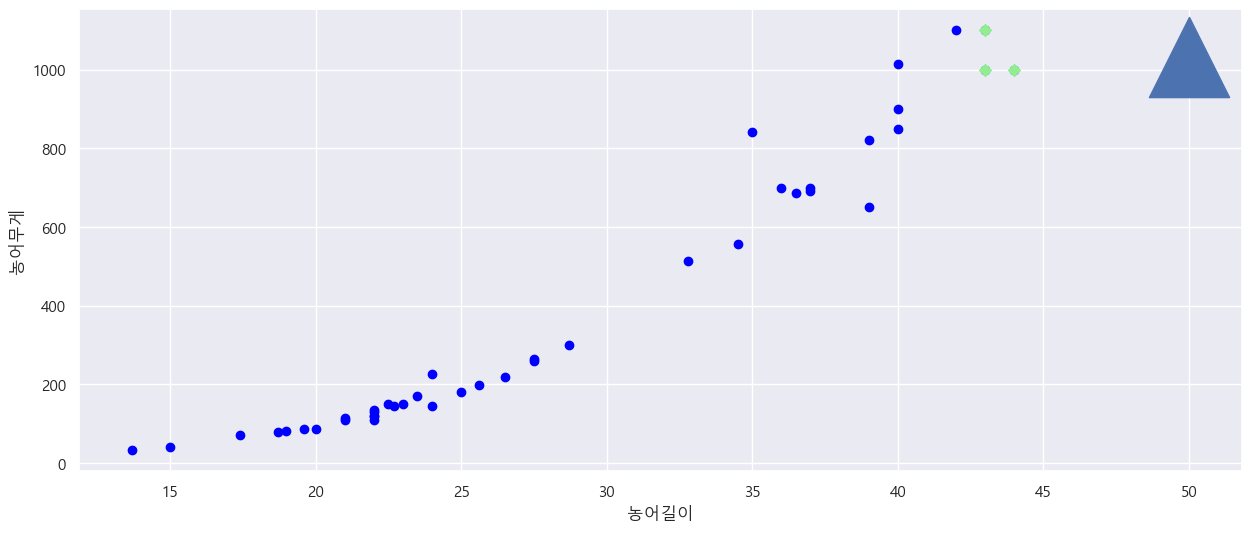

In [16]:
# 농어훈련세트 산점도 그리기
plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, color='blue', label='농어데이터')
# 훈련세트에서 최근접 이웃만 다시 표시
plt.scatter(train_input[indexes], train_target[indexes], marker='D', color='lightgreen', label='이웃데이터')
plt.scatter(50.0, 1033,3333, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.show()

### 선형회귀
- 대표적이 회귀 알고리즘. 직선을 학습하는 알고리즘
- 간단하고 성능이 뛰어남

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr

LinearRegression()

In [19]:
# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [20]:
lr.score(test_input, test_target)

0.824750312331356

In [21]:
lr.predict([[50,]])

array([1241.83860323])

- 50cm 농어는 1241.9g 정도 무게라고 예측됨

In [22]:
# 선형회귀 직선 방정식 확인
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


In [23]:
lr.coef_    # 기울기, 가중치(weight)

array([39.01714496])

In [24]:
lr.intercept_   # 절편

-709.0186449535474

- 농어 무게 = a x (농어길이) + b
    - a(기울기) -> 39.01714496
    - b(절편) -> - 709.018944 

In [25]:
39.01714496 * 50.0 + -709.0186449535474

1241.8386030464528

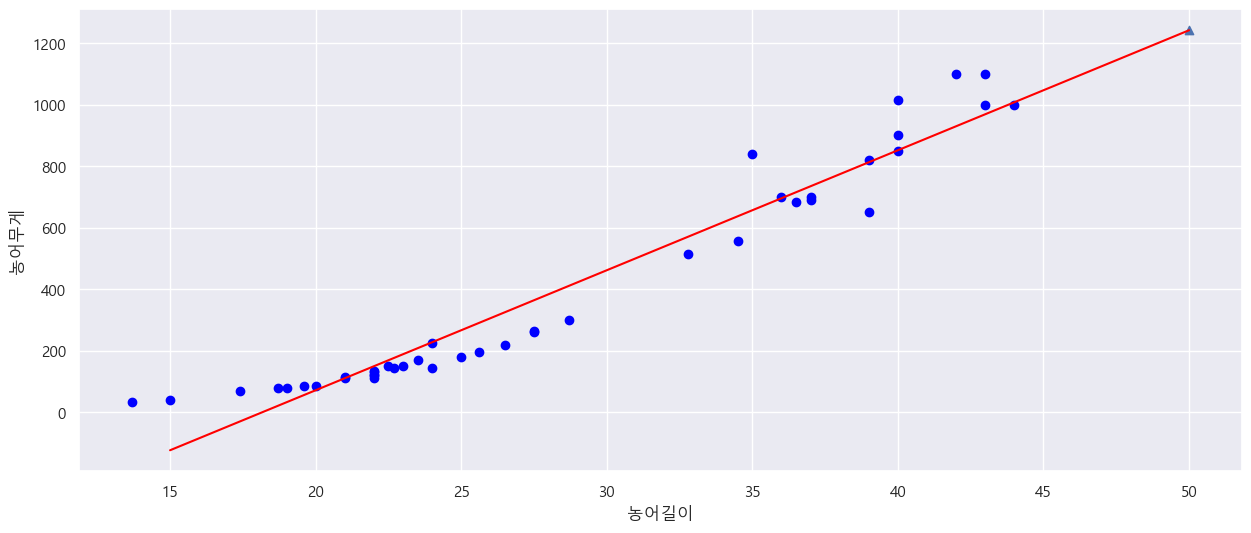

In [26]:
# 농어훈련세트 산점도 그리기
plt.figure(figsize=(15, 6))
plt.scatter(train_input, train_target, color='blue', label='농어데이터')
# 선형회귀 직선 그리기
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='red')
plt.scatter(50.0, 1241.838, marker='^')

plt.xlabel('농어길이')
plt.ylabel('농어무게')
plt.show()

In [27]:
lr.score(train_input, train_target)

0.9398463339976041

In [28]:
lr.score(test_input, test_target)

0.824750312331356

In [29]:
lr.predict([[9.8, ]])

array([-326.65062431])

### 다항회귀
- 2차 방정식이 되어야 하기 때문

In [34]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [36]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [37]:
# 다항회귀 문제 해결
lr2 = LinearRegression()
lr2

LinearRegression()

In [40]:
# 길이 특성에 대한 무게 결과를 훈련
lr2.fit(train_poly, train_target) 

LinearRegression()

In [41]:
# 다항회귀의 기울기(가중치)와 절편
print(lr2.coef_, lr2.intercept_)    

[  1.01433211 -21.55792498] 116.0502107827827


- 길이의 제곱에 들어갈 기울기 - 1.01433211
- 길이에 들어갈 기울기 - -21.55792498
- 절편 - 116.050210...

In [43]:
# 농어 길이 50cm에 대한 무게 예측
lr2.predict([[50**2, 50]])

array([1573.98423528])

In [44]:
# 예측된 값 == 기울기와 절편으로 다항식 계산 값
(1.01433211 * (50**2)) + (-21.55792498 * 50) + 116.0502107827827

1573.9842367827825

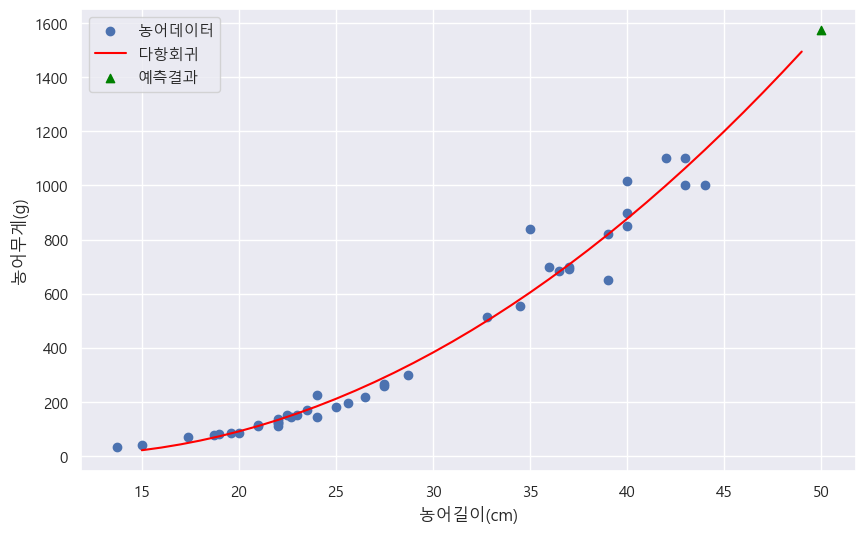

In [60]:
# 다항회귀 차트

# 구간별 직선을 그리기 위해서 15 ~ 49까지 정수 배열 생성
point = np.arange(15, 50)

plt.figure(figsize=(10, 6))
plt.scatter(train_input, train_target, label='농어데이터')

# 15에서 49 사이에 2차 방정식을 그래프로 그림
plt.plot(point, (1.01433211 * (point**2)) + (-21.55792498 * point) + 116.050210782782711, color='red', label='다항회귀')

# 50cm 농어 데이터 표시
plt.scatter([50], [1573.9842367827825], marker='^', color='green', label='예측결과')
plt.xlabel('농어길이(cm)')
plt.ylabel('농어무게(g)')
plt.legend()
plt.show()  # 텍스트 필요없이 차트만 그리기

In [55]:
lr2.score(train_poly, train_target)

0.9706807451768623

In [56]:
lr2.score(test_poly, test_target)

0.9775935108325122

#### 결론
- 직선 선형회귀
    - 훈련세트 정확도 : 93.9%
    - 테스트세트 정확도 : 82.5%
- 다항회귀
    - 훈련세트 정확도 : 97.1%
    - 테스트세트 정확도 : 97.8%

- `선형회귀`는 특성(입력), 타겟 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾는 것
    - 특성이 하나면 직선(단항) 방정식이 생성

- 선형방정식의 `계수(기울기/가중치)`와 `절편`이 저장
- `다항회귀`는 다항 방정식으로 특성과 타겟의 관계를 나타냄
- `LinearRegression` - 가장 단순하고 정확도가 높음 

In [ ]:
#### 